### HW 2 with Univ AI under Harvard Professor Pavlos Protopapas
### Araz Sharma and Harsh Vardhan Goyal

1. This homework has to be done in Tensorflow Version 2.1, as told to us. The below cell has the commands to install that. However, after installing, we need to restart the runtime

2. For the Part 2 pf HW, we trained our Model first, and to avoid re-training of it, we saved the model as a h5 file. This is used to load the model to make predictions and do analysis. The Model Architecture is in a commented code block, and can be run to cross check

3. For the last part, to tes the model on a custom input, we had provided our own image, which is used

**The Model h5 file and Image input is attached in the zip file, which can be loaded in the collab**
<a href = 'https://drive.google.com/file/d/1G-Nb5338n9Ue-N0KHV1qh--rcjescdWO/view?usp=sharing'>Link for Weights and Img</a>

## Flow of Project:

### 1. CNNs on CIFAR-10 Dataset

**1.1 Model Construction and Analysis**

**1.2 Training, Evaluating and Visualising Model on CIFAR-10**

**1.3 Saliency Map, Grad Cam & Score Cam for Correctly Classified Images**

**1.4 Saliency Map, Grad Cam & Score Cam for Incorrectly Classified Images**

### 2. Regression with CNNs for Image Orientation Estimation 

**2.1 Data Analysis for Celeb Data with Tensorflow DataSets**

**2.2 Building,Training and Evaluating CNN**

**2.3.1 Further Analysis with Saliency Map, Grad Cam & Score Cams** 

**2.3.2 Testing Model for Custom Input**


In [ ]:
import os
import requests
import zipfile
import shutil
import json
import time
import sys
import cv2
import numpy as np
import pandas as pd
from glob import glob
import subprocess
import matplotlib.pyplot as plt

%matplotlib inline

import tensorflow as tf

In [ ]:
# Please download the 2.1.0 version of tensorflow for this homework and also tf_keras_vis
!pip3 -qq install tf_keras_vis 
!pip -qq install tensorflow==2.1.0

In [ ]:
#tf.compat.v1.disable_eager_execution()
tf.compat.v1.enable_eager_execution()

print("tensorflow version", tf.__version__)
print("keras version", tf.keras.__version__)
print("Eager Execution Enabled:", tf.executing_eagerly())

# Get the number of replicas 
strategy = tf.distribute.MirroredStrategy()
print("Number of replicas:", strategy.num_replicas_in_sync)

devices = tf.config.experimental.get_visible_devices()
print("Devices:", devices)
print(tf.config.experimental.list_logical_devices('GPU'))

print("GPU Available: ", tf.config.list_physical_devices('GPU'))
print("All Pysical Devices", tf.config.list_physical_devices())

# Better performance with the tf.data API
# Reference: https://www.tensorflow.org/guide/datac_performance
AUTOTUNE = tf.data.experimental.AUTOTUNE

tf.random.set_seed(2266)

tensorflow version 2.1.0
keras version 2.2.4-tf
Eager Execution Enabled: True
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
Number of replicas: 1
Devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[LogicalDevice(name='/device:GPU:0', device_type='GPU')]
GPU Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
All Pysical Devices [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'), PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
print(tf.__version__)

2.1.0


In [ ]:
import tensorflow as tf
import tensorflow_addons as tfa
import numpy as np
import os



import certifi
import urllib3  # For handling https certificate verification 
import scipy.ndimage as ndimage
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
pip install tf-keras-vis

In [ ]:
import numpy as np

from PIL import Image

from matplotlib import pyplot
import matplotlib.pylab as plt 
from scipy.signal import convolve2d
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.metrics import Accuracy

#Some imports for getting the CIFAR-10 dataset and for help with visualization*]
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils import normalize
from matplotlib import cm
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils import normalize
from PIL import Image


import tensorflow_addons as tfa

import os
import certifi
import urllib3  # For handling https certificate verification 
import scipy.ndimage as ndimage
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# get feature map helper code by TA's
def get_feature_maps(model, layer_id, input_image):
    """Returns intermediate output (activation map) from passing an image to the model
    
    Parameters:
        model (tf.keras.Model): Model to examine
        layer_id (int): Which layer's (from zero) output to return
        input_image (ndarray): The input image
    Returns:
        maps (List[ndarray]): Feature map stack output by the specified layer
    """
    model_ = Model(inputs=[model.input], outputs=[model.layers[layer_id].output])
    return model_.predict(np.expand_dims(input_image, axis=0))[0,:,:,:].transpose((2,0,1))

1.1 Report total number of parameters

In [ ]:
# a simple CNN with 2 convolution layers and 2 dense layers to check increase in number of parameters.
# number of nodes in dense layers will remain constant 
# number of filters in CNN layers increased linearly 

linear_parameters = []
for i in range(10):
  model = Sequential()
  model.add(Conv2D(8+i, kernel_size=3, input_shape=[32,32,3]))
  model.add(Conv2D(16+i, kernel_size=3))
  model.add(Flatten())
  model.add(Dense(8))
  model.add(Dense(1))
  linear_parameters.append(model.count_params())



In [ ]:
# a simple CNN with 2 convolution layers and 2 dense layers to check increase in number of parameters.
# number of nodes in dense layers will remain constant 
# number of filters in CNN layers increased linearly 

exp_parameters = []
for i in range(10):
  model = Sequential()
  model.add(Conv2D(2**i, kernel_size=3, input_shape=[32,32,3]))
  model.add(Conv2D(2**(i+1), kernel_size=3))
  model.add(Flatten())
  model.add(Dense(8))
  model.add(Dense(1))
  exp_parameters.append(model.count_params())



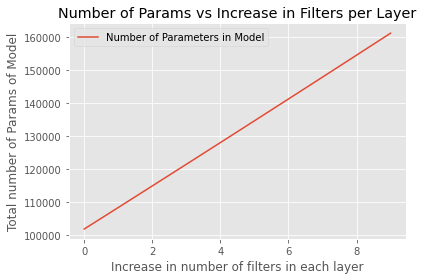

In [166]:
plt.plot([i for i in range(10)], linear_parameters, label = 'Number of Parameters in Model')
plt.legend()
plt.title('Number of Params vs Increase in Filters per Layer')
plt.xlabel('Increase in number of filters in each layer')
plt.ylabel('Total number of Params of Model')
plt.tight_layout()

### Inference: 
All other variables such as shape of input data, number of dense layers, kernel size, stride have been kept constant to compare increase in number of neurons linearly. On the x axis we have depicted the linear increase in number of convolutional layer in each layer. Initially the number of convlutional layer in the first one is 8 and in the second layer is 16. 

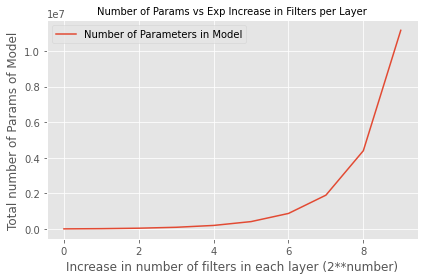

In [165]:
plt.plot([i for i in range(10)], exp_parameters, label = 'Number of Parameters in Model')
plt.legend()
plt.title('Number of Params vs Exp Increase in Filters per Layer', fontsize = 10)
plt.xlabel('Increase in number of filters in each layer (2**number)')
plt.ylabel('Total number of Params of Model')
plt.tight_layout()


### Inference
All other variables are constant as mentioned in the above plot. The number of convolutional layer are equal to 2, number of initial layers in each convolutional layer is 2. We have increase the number of layers exponentially with the factor of 2 and see that number of trainable parameters have exploded. 

### 1.2 Choose a model, train and evaluate it 

### Loading the CIFAR-10 Dataset

In [ ]:
#load cifar 10 dataframe 
complete_dataset = tf.keras.datasets.cifar10

In [ ]:
#datain respective variables
(x_train, y_train), (x_test, y_test) = complete_dataset.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
print("Shape of x_train", x_train.shape, 'and shape of y_train', y_train.shape)
print('Shape of x_test', x_test.shape, 'shape of y_test', y_test.shape)

Shape of x_train (50000, 32, 32, 3) and shape of y_train (50000, 1)
Shape of x_test (10000, 32, 32, 3) shape of y_test (10000, 1)


In [ ]:
cifar10dict = {0 : 'airplane', 1 : 'automobile', 2 : 'bird', 3 : 'cat', 4 : 'deer', 5 : 'dog', 6 : 'frog', 7 : 'horse', 8 : 'ship', 9 : 'truck'}

In [ ]:
cifar10dict

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

In [ ]:
# one hot encode 
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [ ]:
# normalize pixel values
x_train , x_test = x_train/ 255. , x_test/ 255.0

### Building Custom CNN Model

In [ ]:
#Initial model with Conv2D, MaxPooling2D, Dense, Dropout and Flatten layers 
CNN = Sequential(name="base_model")
CNN.add(Conv2D(64, 3, padding='same', activation = 'relu', input_shape=[32,32,3]))
CNN.add(MaxPooling2D(2))
CNN.add(Conv2D(128, 3, padding='same', activation='relu'))
CNN.add(Conv2D(128, 3, padding='same', activation='relu'))
CNN.add(MaxPooling2D(2))
CNN.add(Conv2D(256, 3, padding='same', activation='relu'))
CNN.add(Conv2D(256, 3, padding='same', activation='relu'))
CNN.add(MaxPooling2D(2))
CNN.add(Flatten())
CNN.add(Dense(128, activation = 'relu'))
CNN.add(Dropout(0.5))
CNN.add(Dense(64, activation='relu'))
CNN.add(Dropout(0.5))
CNN.add(Dense(10, activation='softmax'))



# 1.2.1

In [ ]:
CNN.summary()

Model: "base_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 8, 8, 256)         5

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',patience = 10, restore_best_weights = True)

In [ ]:
CNN.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:

history = CNN.fit(x_train, y_train, epochs =100, verbose =1 , validation_data= (x_test, y_test), callbacks=[callback])

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 20s 406us/sample - loss: 1.9656 - accuracy: 0.2387 - val_loss: 1.5953 - val_accuracy: 0.3970
Epoch 2/100
50000/50000 [==============================] - 13s 257us/sample - loss: 1.5930 - accuracy: 0.4041 - val_loss: 1.4275 - val_accuracy: 0.4921
Epoch 3/100
50000/50000 [==============================] - 13s 258us/sample - loss: 1.3737 - accuracy: 0.5107 - val_loss: 1.1716 - val_accuracy: 0.5844
Epoch 4/100
50000/50000 [==============================] - 13s 256us/sample - loss: 1.2129 - accuracy: 0.5776 - val_loss: 1.0789 - val_accuracy: 0.6304
Epoch 5/100
50000/50000 [==============================] - 13s 257us/sample - loss: 1.1083 - accuracy: 0.6236 - val_loss: 1.0038 - val_accuracy: 0.6519
Epoch 6/100
50000/50000 [==============================] - 13s 263us/sample - loss: 1.0341 - accuracy: 0.6525 - val_loss: 1.0055 - val_accuracy: 0.6488
Epoch 7/100
50000/50000 [=============

# 1.2.2

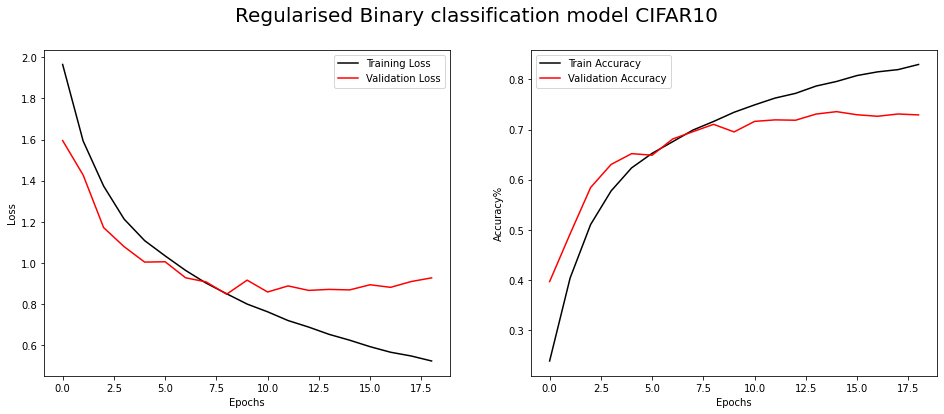

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(16,6))
ax[0].plot(history.history['loss'], label = 'Training Loss', color='black')
ax[0].plot(history.history['val_loss'], label = 'Validation Loss', color='red')
ax[1].plot(history.history['accuracy'], label ='Train Accuracy', color='black')
ax[1].plot(history.history['val_accuracy'], label = 'Validation Accuracy', color='red')
ax[0].legend()
ax[1].legend()
ax[0].set_xlabel('Epochs')
ax[1].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[1].set_ylabel('Accuracy%')
fig.suptitle('Regularised Binary classification model CIFAR10',fontsize=20 )
plt.show()
 

In [ ]:
#Test Accuracy
from sklearn.metrics import accuracy_score

y_pred_tst = CNN.predict_classes(x_test)
tst_accur = accuracy_score(np.argmax(y_test, axis = 1), y_pred_tst)
#print('test set',y_test)
#print('y_pred_tst', y_pred_tst)
print('Test Accuracy is:', tst_accur)

Test Accuracy is: 0.7103


### Inference :
A fairly simple model has been used for classification of Cifar10 data set and we have achived a test accuracy score of almost 70%. We have used the following layers - Conv2D,Maxpooling, Dropout, Dense in our model. We have also used early stopping regularisation. 

As the aim of the homework was not to get the best accuracy but to visualize different kinds of plots we have not spent a lot of time to increase the model accuracy. 

### Visualising Filters in each Layer

In [ ]:
# get shape of filters in CNN model 
for layer in CNN.layers:
  # check for convolutional layer 
  if 'conv' not in layer.name:
    continue
  #get filter weights 
  filters, biases = layer.get_weights()
  print(layer.name, filters.shape)


conv2d_40 (3, 3, 3, 64)
conv2d_41 (3, 3, 64, 128)
conv2d_42 (3, 3, 128, 128)
conv2d_43 (3, 3, 128, 256)
conv2d_44 (3, 3, 256, 256)


In [ ]:
#retrive weights 
filters, biases = CNN.layers[0].get_weights()

In [ ]:
#normalize filter values to 0-1 for visualize 
f_min, f_max = filters.min(), filters.max()
filters= (filters - f_min)/ (f_max - f_min)

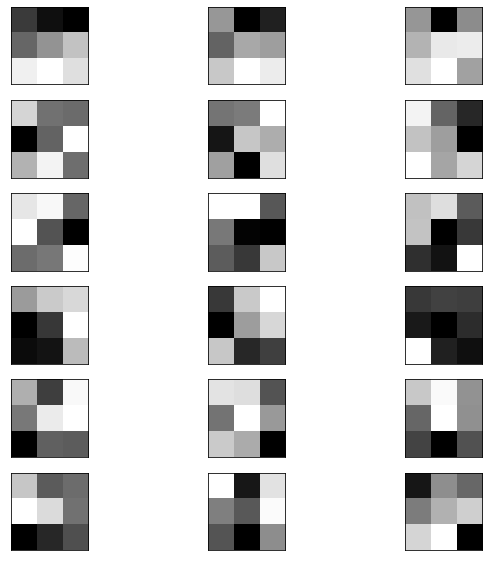

In [ ]:
#Plotting the first few filters
#Helps to improve understanding of how the filters are working  
n_filters, ix = 6, 1
fig, ax = plt.subplots(n_filters, 3, figsize = (10,10))
for i in range(n_filters):
  f = filters[:,:,:,i]
  #plot each channel separately 
  for j in range(3):
    ax[i][j].imshow(f[:,:,j], cmap ='gray')
    ax[i][j].set_xticks([])
    ax[i][j].set_yticks([])
    #plot in grey scale 
    #pyplot.imshow(f[:,:,j], cmap ='gray')
    #ix +=1
#show the figure
plt.show()

### Inference:
We have plotted kernels for the first layer of our network. This gives us an idea of how the convolution is happening although to visualize all kerenls would require a lot of space, we get a good intution through this plot. 

### Visualising Feature Maps for Convolution Layers

In [ ]:
#summarize feature map size for each conv layer 
for i in range(len(CNN.layers)):
  layer = CNN.layers[i]
  if 'conv' not in layer.name:
    continue
  print(i, layer.name, layer.output.shape)

0 conv2d_40 (None, 32, 32, 64)
2 conv2d_41 (None, 16, 16, 128)
3 conv2d_42 (None, 16, 16, 128)
5 conv2d_43 (None, 8, 8, 256)
6 conv2d_44 (None, 8, 8, 256)


In [ ]:
# design a new model that is a subset of the layers in the full CNN model 

cnn = Model(inputs=CNN.inputs, outputs=CNN.layers[2].output)

In [ ]:
cnn.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40_input (InputLayer) [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 16, 16, 128)       73856     
Total params: 75,648
Trainable params: 75,648
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#get image from test set that has been correctly classified 
from sklearn.metrics import accuracy_score

# seperating indexes of correct and incorrect predicitons 
y_train_pred = CNN.predict_classes(x_train)
y_test_pred = CNN.predict_classes(x_test)
test_correct_predictions = np.where(y_test_pred == np.argmax(y_test, axis = 1))#.argmax(axis=1))
test_incorrect_predictions = np.where(y_test_pred != np.argmax(y_test, axis = 1))#.argmax(axis=1))

In [ ]:
#function to prepare image before ploting maps 
def prepare_image(image):
  # height, width, channels
  img_array = tf.keras.preprocessing.image.img_to_array(image)                                  
  # (batch_size, height, width, channels), add a dimension because Keras works with batches of images
  img_array_expanded_dims = np.expand_dims(img_array, axis=0)           
  # the preprocess function adequates your image to the format that the model requires
  return img_array_expanded_dims  

In [ ]:
 #Randomly choose a Correctly Predicted Image & preparing the image
import random
cor_ind = test_correct_predictions[0][random.randrange(len(test_correct_predictions[0]))]
cor_img = x_test[cor_ind]

crct_cls = np.argmax(y_test,axis = 1)[cor_ind]
image = prepare_image(cor_img)



In [ ]:
#preprocessing image 
cimg = cor_img
img_array = tf.keras.preprocessing.image.img_to_array(cimg)
img_array_expanded_dims = np.expand_dims(img_array,  axis=0)

In [ ]:
img_array_expanded_dims.shape

(1, 32, 32, 3)

In [ ]:
feature_maps = cnn.predict(img_array_expanded_dims)

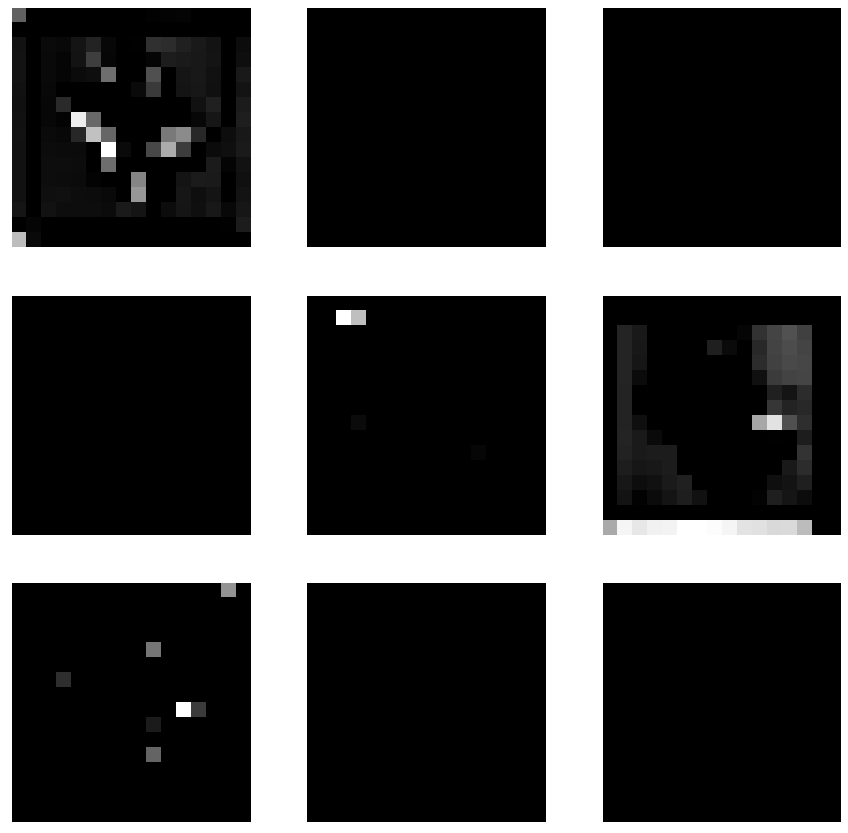

In [167]:
# Plot 9 Feature Maps in 3x3 Squares
maps = 9
fig, ax = plt.subplots(3,3, figsize = (15,15))
ix = 0
for i in range(3):
	for j in range(3):
		ax[i][j].imshow(feature_maps[0 ,:, :, ix], cmap = 'gray')
		ax[i][j].set_xticks([])
		ax[i][j].set_yticks([])
		ix+=1

plt.show()

# 1.3
### Visualize Feature Maps 
The features maps in this plot is from the output of second layer there fore we can clearly see that the feature maps is learning low level features such as edge detection. 
We have randomly chosen images for visualization but the general inference is that most of the feature maps are completely dark and some of them do edge detection pretty well for that image. This could mean that the model is not generalising well and has specialized certain kernels to detect certain classes. 

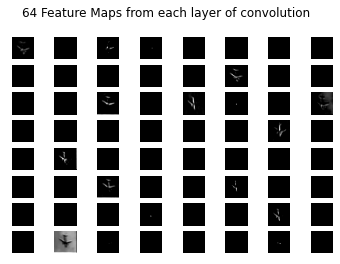

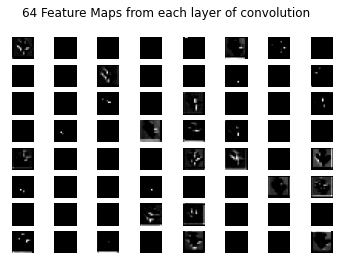

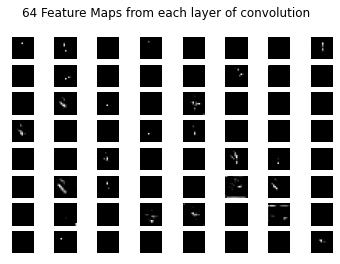

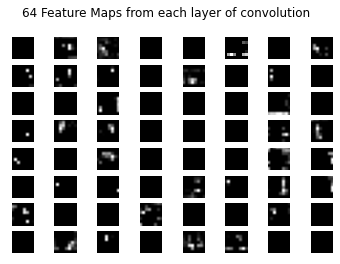

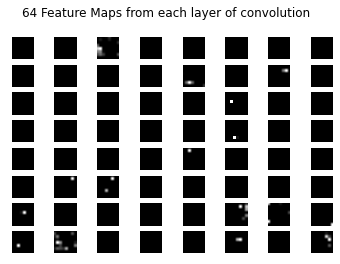

In [168]:
ixs = [0,2,3,5,6]
outputs = [CNN.layers[i].output for i in ixs]
cnn2 = Model(inputs=CNN.inputs, outputs = outputs)
img_array2 = tf.keras.preprocessing.image.img_to_array(cor_img)
img_array_expanded_dims2 = np.expand_dims(img_array2,  axis=0)
feature_maps_combined = cnn2.predict(img_array_expanded_dims2)
square = 8 
for fmap in feature_maps_combined:
  ix = 1
  for _ in range(square):
    for _ in range(square):
      ax = pyplot.subplot(square, square, ix)
      ax.set_xticks([])
      ax.set_yticks([])
      pyplot.imshow(fmap[0,:,:,ix-1], cmap='gray')
      ix +=1
  plt.suptitle('64 Feature Maps from each layer of convolution')
  pyplot.show()

### Feature Maps Visualization plot 2 
We have plotted the output each convolution layer in our network. This gives us a very good idea of how the network is learning as it goes deeper. 
1. In the first two plots we can clearly see that the network is learning low level features such as edge detection, and diagnal, horizontal and vertical lines 
2. In the second layer we start to see that the network is learning some high level features. 
3. In plot 4 and 5 the feature maps does not resemple the pictures at all therefore are trying to learn high level features and understand the image as a whole. 


## Saliency Maps , Grad Cam and Score Cams

In [ ]:
# importing the required libraries
!pip -qq install tf_keras_vis 
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import cv2
import glob
import os
import pickle
import zipfile
import tensorflow as tf
from tensorflow.keras import layers
from __future__ import print_function

from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils import normalize
from PIL import Image
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

In [ ]:
# model modifier and loss output 
def model_modifier(m):
  m.layers[-1].activation = tf.keras.activations.linear
  return m
def loss(output): 
  global crct_cls
  return (output[0][crct_cls])

In [ ]:
model_modifier(CNN)
saliency =Saliency(CNN, 
                   model_modifier = model_modifier, 
                   clone =False)


In [ ]:
saliency_map = saliency(loss, image)
saliency_map = normalize(saliency_map)

In [ ]:
#smoothgrad 
smooth_grad = saliency(loss, image, smooth_samples=20, smooth_noise=0.20)
smooth_grad = normalize(smooth_grad)
#plt.imshow(smooth_grad[0], cmap='Purples')

In [ ]:
#gradcam 
gradcam = Gradcam(CNN, model_modifier=model_modifier, clone = False)
gcam = gradcam(loss, image)
gcam = normalize(gcam)
#plt.imshow(cor_img)
#plt.imshow(gcam[0], cmap='jet', alpha=0.4)

In [ ]:
from tf_keras_vis.gradcam import GradcamPlusPlus
gradcam = GradcamPlusPlus(CNN, model_modifier=model_modifier, clone = False)
gpcam = gradcam(loss, image)
gpcam = normalize(gpcam)
#plt.imshow(cor_img)
#plt.imshow(gpcam[0], cmap='jet', alpha=0.4)

In [ ]:
from tf_keras_vis.scorecam import ScoreCAM

# Create ScoreCAM object
scorecam = ScoreCAM(CNN, model_modifier = model_modifier, clone=False)

# Generate heatmap with Faster-ScoreCAM
scam = scorecam(loss,image)
scam = normalize(scam)

#plt.imshow(cor_img)
#plt.imshow(scam[0], cmap='jet', alpha=0.5)


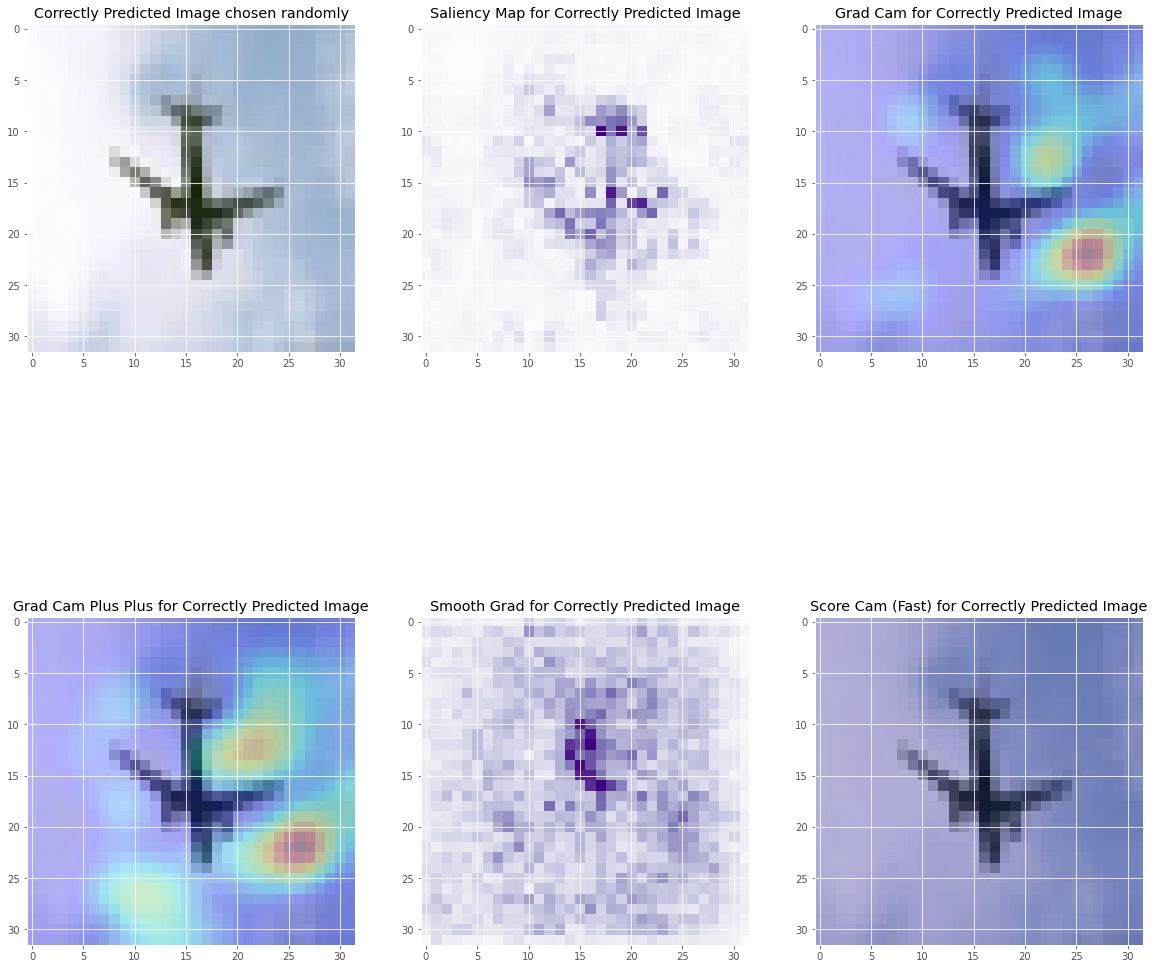

In [ ]:
fig, ax = plt.subplots(2,3, figsize = (20,20))

ax[0][0].imshow(cor_img)
ax[0][0].set_title('Correctly Predicted Image chosen randomly')

ax[0][1].imshow(saliency_map[0],cmap='Purples')
ax[0][1].set_title('Saliency Map for Correctly Predicted Image')


ax[1][2].imshow(cor_img)
ax[1][2].imshow(scam[0], cmap='jet', alpha=0.3)
ax[1][2].set_title('Score Cam (Fast) for Correctly Predicted Image')

ax[1][1].imshow(smooth_grad[0], cmap='Purples')
ax[1][1].set_title('Smooth Grad for Correctly Predicted Image')

ax[0][2].imshow(cor_img)
ax[0][2].imshow(gcam[0], cmap='jet', alpha=0.3)
ax[0][2].set_title('Grad Cam for Correctly Predicted Image')

ax[1][0].imshow(cor_img)
ax[1][0].imshow(gpcam[0], cmap='jet', alpha=0.3)
ax[1][0].set_title('Grad Cam Plus Plus for Correctly Predicted Image')

plt.show()

# 1.4
### Visualising Saliency map and grad cam of correctly classified images. 
1. We have used sequesntial cmap('purples') for saliency maps and jet cmap for grad cam and score cam
2. We have randomly selected an image which has been correctly classified by the model to be presented here. 
3. We have plotted not only the saliency map but also smooth grad with it to experiment with out visualisations
4. We have also used Gradcam and gradcam++ for our visualisation 
5. lastly we have used Score cam for our visualisations
6. We have noticed that the image being classified correctly does not say with absolute certainity that the pixel that have resulted in the correct classification of the image are the pixels of the image that represent that object. 
7. for example in case of deer and bird we saw that the gradcam was using the background of the picture to classify the image. 
8. We also realise that some features are play a more important role in classification of the image that others. This can be easily visualied with gradcam and score cam as they tend to concentrate on smaller yet distictive features for classification of the image where as we can see that smooth grad and grad cam ++ generalizes better. 

Is classified as: airplane
Correct Class should be: bird


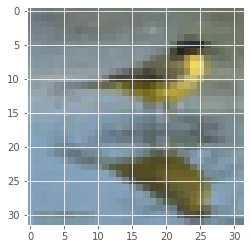

In [ ]:
 
#Randomly choose an  Incorrectly Predicted Image & preparing the image
import random
incor_ind = test_incorrect_predictions[0][random.randrange(len(test_incorrect_predictions[0]))]
incor_img = x_test[incor_ind]
plt.imshow(incor_img)
incrct_cls = y_test_pred[incor_ind]
print('Is classified as:', cifar10dict[incrct_cls])
correct_lbl = np.argmax(y_test, axis = 1)[incor_ind]
print('Correct Class should be:', cifar10dict[correct_lbl])
ic_image = prepare_image(incor_img)



In [ ]:
def incor_loss(output): #did not understand
  global incrct_cls
  return (output[0][incrct_cls])

In [ ]:
model_modifier(CNN)
saliency =Saliency(CNN, 
                   model_modifier = model_modifier, 
                   clone =False)
saliency_map = saliency(incor_loss, ic_image)
saliency_map = normalize(saliency_map)

In [ ]:
#smoothgrad 
smooth_grad = saliency(incor_loss, ic_image, smooth_samples=20, smooth_noise=0.20)
smooth_grad = normalize(smooth_grad)
#plt.imshow(smooth_grad[0], cmap='Purples')

In [ ]:
#gradcam 
gradcam = Gradcam(CNN, model_modifier=model_modifier, clone = False)
gcam = gradcam(incor_loss, ic_image)
gcam = normalize(gcam)
#plt.imshow(cor_img)
#plt.imshow(gcam[0], cmap='jet', alpha=0.4)

In [ ]:
gradcam = GradcamPlusPlus(CNN, model_modifier=model_modifier, clone = False)
gpcam = gradcam(incor_loss, ic_image)
gpcam = normalize(gpcam)
#plt.imshow(cor_img)
#plt.imshow(gpcam[0], cmap='jet', alpha=0.4)

In [ ]:
# Create ScoreCAM object
scorecam = ScoreCAM(CNN, model_modifier = model_modifier, clone=False)

# Generate heatmap with Faster-ScoreCAM
scam = scorecam(incor_loss,ic_image)
scam = normalize(scam)

#plt.imshow(cor_img)
#plt.imshow(scam[0], cmap='jet', alpha=0.5)


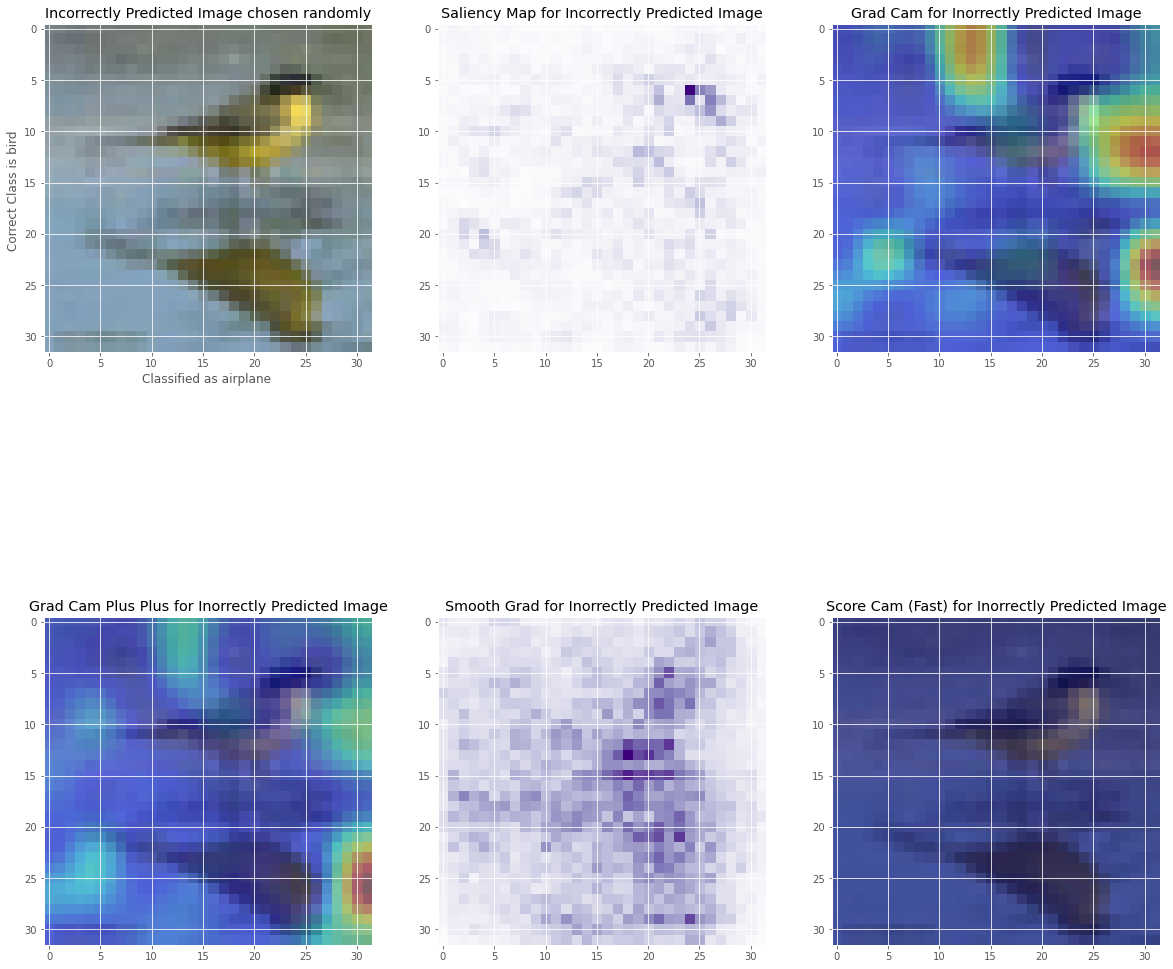

In [ ]:
fig, ax = plt.subplots(2,3, figsize = (20,20))

ax[0][0].imshow(incor_img)
ax[0][0].set_title('Incorrectly Predicted Image chosen randomly')
ax[0][0].set_xlabel(f'Classified as {cifar10dict[incrct_cls]} ')
ax[0][0].set_ylabel(f'Correct Class is {cifar10dict[correct_lbl]} ')

ax[0][1].imshow(saliency_map[0],cmap='Purples')
ax[0][1].set_title('Saliency Map for Incorrectly Predicted Image')


ax[1][2].imshow(incor_img)
ax[1][2].imshow(scam[0], cmap='jet', alpha=0.5)
ax[1][2].set_title('Score Cam (Fast) for Inorrectly Predicted Image')

ax[1][1].imshow(smooth_grad[0], cmap='Purples')
ax[1][1].set_title('Smooth Grad for Inorrectly Predicted Image')

ax[0][2].imshow(incor_img)
ax[0][2].imshow(gcam[0], cmap='jet', alpha=0.4)
ax[0][2].set_title('Grad Cam for Inorrectly Predicted Image')

ax[1][0].imshow(incor_img)
ax[1][0].imshow(gpcam[0], cmap='jet', alpha=0.4)
ax[1][0].set_title('Grad Cam Plus Plus for Inorrectly Predicted Image')

plt.show()

# 1.5
### Visualising Saliency map and grad cam of incorrectly classified images.
1. We have plotted the same graphs as in the above question, 
2. During writing the inference of this question we have received the image of a car being classified as an airplane 
3. we can clearly see with the help of the saliency map that the highest pixel attributing for classification are more in shape of an airplane than a car
4. thorugh gradcam and gradcam++ we can see that the image as a lot of heat map focusing on the sky which is a big part of the image of the car
5. We can easily say that the model has incorrectly classified as a plane because the model uses the pixels that represent the sky to classify it as a plane thus suggesting that the model is not very accurate and might have a low confidence level for even correctly classified images. 

## 2. Regression with CNN: Image Orientation Estimatiom

In [ ]:
#mount your own drive to avoid downloading the data multiple time 

from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#Following creates a directory, downloads the file and unzips it. 

if os.path.isdir('gdrive/My Drive/celeb_a/2.0.1'):
    print('Found dataset' )
else:
    os.makedirs('gdrive/My Drive/celeb_a')
    !gdown -qq https://drive.google.com/u/2/uc?id=1CdfrT4f87b8ggx02TxsBuMTu0bqSIpNX&export=download
    !unzip 2.0.1.zip  -d gdrive/My\ Drive/celeb_a/

Found dataset


In [ ]:
# This command will use the celeb_a dataset that you downloaded, and load it into train and test 'tensorflow.Datasets'

train_celeb, test_celeb = tfds.load('celeb_a', split=['train', 'test'], shuffle_files=False, data_dir = 'gdrive/My Drive/', download=False)

In [ ]:
# You may use the following two functions
def normalize_image(img):
    return tf.cast(img, tf.float32)/255.

def rot_resize(img, deg):
    rotimg = ndimage.rotate(img, deg, reshape=False, order=3)
    rotimg = np.clip(rotimg, 0., 1.)
    rotimg = tf.image.resize_with_crop_or_pad(rotimg,140,120)
    return rotimg

################################################################
# Don't manually invoke these functions; they are for Dataset 
# pipelining that is already done for you.
################################################################
def tf_rot_resize(img, deg):
    """Dataset pipe that rotates an image and resizes it to 140x120"""
    rotimg = tfa.image.rotate(img, deg/180.*np.pi, interpolation="BILINEAR")
    #rotimg = np.clip(rotimg, 0., 1.)
    rotimg = tf.image.resize_with_crop_or_pad(rotimg,140,120)
    return rotimg

def tf_random_rotate_helper(image):
    """Dataset pipe that normalizes image to [0.,1.] and rotates by a random
    amount of degrees in [-60.,60.], returning an (input,target) pair consisting
    of the rotated and resized image and the degrees it has been rotated by."""
    image = normalize_image(image)
    deg = tf.random.uniform([],-60.,60.)
    return (tf_rot_resize(image,deg), deg)  # (data, label)

def tf_random_rotate_image(element):
    """Given an element drawn from the CelebA dataset, this returns a rotated
    image and the amount it has been rotated by, in degrees."""
    image = element['image']
    image, label = tf_random_rotate_helper(image)
    image.set_shape((140,120,3))
    return image, label
################################################################

In [ ]:
# Pipeline for creating randomly rotated images with their target labels being 
# the amount they were rotated, in degrees.
train_rot_ds = train_celeb.map(tf_random_rotate_image)
test_rot_ds = test_celeb.map(tf_random_rotate_image)

# 2.1.1

### **Introduction**
So far we have only used datasets that fit in memory, but for practical applications in deep learning we will need to train our models on very large datasets that will not fit the RAM. This is where the Tensorflow DATA API comes in. 
### **Simple explanation**
For the tf Data API, we can create a dataset object and tell it where to get the data from and how to transform it. Tensorflow takes care of all implementation details such as multireading, queuing,batching, and prefetching. The DATA API also has support for reading from SQL databases. 
### **Motivation**
We want to be able to read huge datasets efficiently which is not only difficult, but the data also needs to be preprocessed, usually normalized. 
The data may not always be composed of numerical fields only instead it can have text features, categorical features, etc which need to be coded using one-hot encoding etc. 
### **Features**


To **iterate** over a dataset item 


```
for item in dataset:
  print(item)
```


**Transformations** - Once we have a dataset we can apply all sorts of transformations to it by calling its transformation methods. 
We can do intensive computations for preprocessing the data using this function.


```
dataset = dataset.map(lambda x: x*2)
```
 While map method applies transformation to each line the apply() method applies the transformation to dataset as a whole.

 It is also possible to simply filter dataset using the filter() method

**Shuffling the data** - We know that optimizers such as gradient descsent works best when the instances in training set are independent and identically distributed. We can do this using the shuffle() method, which will create a new dataset that will start by filling up a buffer and whenever asked for an item it will give one randomly and replace it from the original dataset, until it has iterated entirely through the dataset. We have to specify the buffer size which should be large enough otherwise the shuffling will not be effective. (not more than the size of RAM). We can also provide a **ramdom seed**.


```
dataset = dataset.shuffle(buffer_size=5, seed=42)
```



### **Conclusion**
As we can see, the tensorflow data API makes it very simple to process large amounts of data without having to worry about the memory of the computer. Going forward we can see why tensorflow data api along with other I/O and preprocessing api such as tf.feature_column, tf.audio, tf.image, tf.io, tf.queue will be required to wrangle big data for the purpose of training our neural networks. 

### **2.1.2** **Taking a look**.

In a grid of subplots, plot at least 4 rotated images from `train_rot_ds` with the titles being the amount the images have been rotated. The floating point numbers in the titles should have a reasonable number of digits. 

Hint: one way to get a few image+label tuples from the Dataset is with `train_rot_ds.take(4)`. Check the [TensorFlow Datasets documentation](https://www.tensorflow.org/api_docs/python/tf/data/Dataset) for more.

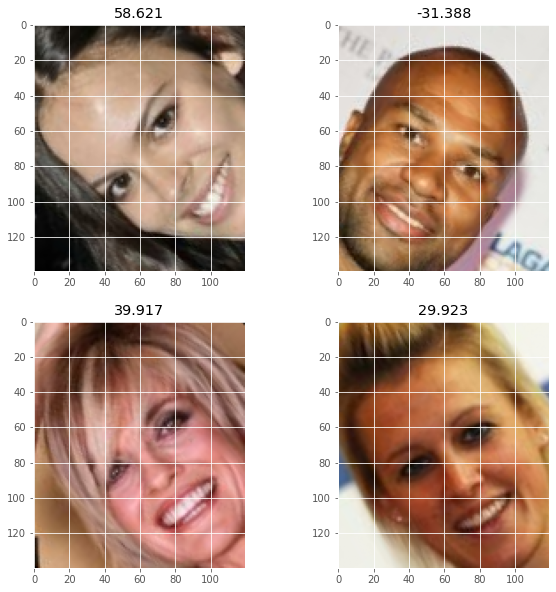

In [ ]:
fig, ax = plt.subplots(2,2, figsize = (10,10))
cnt = 0
for i in train_rot_ds.take(4):
  if(cnt%2==0): #If it's at 1st or 3rd
    j = 0
  else:
    j = 1
  ax[cnt//2][j].imshow(i[0])
  ax[cnt//2][j].set_title(f'{round(float(i[1]), 3)}')
  cnt+=1

# 2.1.3
### Dropout
At every training step, every neuron excluding the output layer has a probability p of being temporarily 'dropped out' that is it will ignored during the training step or epoch but may be activated in the next training set. The hyper parameter p is called the dropout rate that is typically set between 10 to 50%. After training the nuerons do not get dropped anymore. 

The neurons when dropout layer is used generalzie better as they are less senitive to to slight changes in the inputs and also avoids specialization of neurons which results in overfitting. We also quickly realize that for each iteration a unique neuralnetwork is generated. Since each neuron can be either present or absent there are a total of 2^N possible networks where N is the total number of droppable neurons. These NN are not independent to each other as they share weights and baises. 

Dropout has seen to significantly boost performance of even the state of the art neural networks and is one of the most popular regularisation methods. If the model is overfitting we can increase the dropout rate and if the model is underfitting we can decrease the dropout rate. 

**Monte Carlo Dropout**
 was first introduced in 2016.


*   The paper established a connection between neural networks with dropout layer and approximate bayesian inference thus giving dropout a mathematical justification. 
*   The paper also introduced the technique called MC Dropout, which can boost the model performace further quite similar to the the bagging model we used in HW1.

The monte carlo dropout method makes a stack of predictions instead of just making a single pridection, we can then calculate the mean probability prediction for each class and the standard deviation thus giving us a confident prediction. We can also use this method to boost dropout models and provides us with better uncertainity estimates. 

**Conclusion:**
We believe that Dropout can be used in the Dense Layers for a CNN, and we have also used it in our Model. However, it is unclear as to including a 'Dropout' layer in the Convolution Layers

In [ ]:
'''
# Load a SOTA model with trained weights

#### YOUR CODE HERE ####
base_model = MobileNet(include_top= False, input_shape= (224,224,3))

# Alter the FFNN to add on top of the SOTA
#l_2 = regularizers.l2(l2=0.1)
#### YOUR CODE HERE ####
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation= 'relu')(x)#, kernel_regularizer= l_2)(x)
#x = Dropout(0.1)(x)
x = Dense(512, activation= 'relu')(x)
#x = Dropout(0.05)(x)

#Final Layer
preds = Dense(1, activation= 'linear')(x)

# Setup and summarize the model

#### YOUR CODE HERE ####
model = Model(inputs = base_model.input, outputs = preds)
model.summary()

# Compile the model with appropriate loss, optimizer and metric

#### YOUR CODE HERE ####

#Freezing Layers
for layer in model.layers[:6]:
    layer.trainable = False

#Compiling
model.compile(loss = 'mean_squared_error', optimizer = Adam(), metrics= ['accuracy'])
#Fitting
train_rot_ds = train_rot_ds.batch(32)
test_rot_ds = test_rot_ds.batch(32)
CNN_rot.fit(train_rot_ds, validation_data= test_rot_ds, epochs = 5, steps_per_epoch = 100, validation_steps = 10)
'''

"\n# Load a SOTA model with trained weights\n\n#### YOUR CODE HERE ####\nbase_model = MobileNet(include_top= False, input_shape= (224,224,3))\n\n# Alter the FFNN to add on top of the SOTA\n#l_2 = regularizers.l2(l2=0.1)\n#### YOUR CODE HERE ####\nx = base_model.output\nx = GlobalAveragePooling2D()(x)\nx = Dense(1024, activation= 'relu')(x)#, kernel_regularizer= l_2)(x)\n#x = Dropout(0.1)(x)\nx = Dense(512, activation= 'relu')(x)\n#x = Dropout(0.05)(x)\n\n#Final Layer\npreds = Dense(1, activation= 'linear')(x)\n\n# Setup and summarize the model\n\n#### YOUR CODE HERE ####\nmodel = Model(inputs = base_model.input, outputs = preds)\nmodel.summary()\n\n# Compile the model with appropriate loss, optimizer and metric\n\n#### YOUR CODE HERE ####\n\n#Freezing Layers\nfor layer in model.layers[:6]:\n    layer.trainable = False\n\n#Compiling\nmodel.compile(loss = 'mean_squared_error', optimizer = Adam(), metrics= ['accuracy'])\n#Fitting\ntrain_rot_ds = train_rot_ds.batch(32)\ntest_rot_ds = test_

In [ ]:
'''

#Setting up CNN

#Since Authors of Papers used an Alex Net like Architecture, will try to attempt to do the same
#5 conv2Ds + 3 FFC

#Input shape is 140, 120, 3

CNN_rot = Sequential(name = 'Rot_Model')
CNN_rot.add(Conv2D(64, 11, input_shape = [140,120,3] , activation = 'relu'))
CNN_rot.add(MaxPooling2D(2))
CNN_rot.add(Conv2D(128, 5, padding= 'same', activation= 'relu'))
CNN_rot.add(MaxPooling2D(2))
CNN_rot.add(Conv2D(256, 3, padding = 'same',activation = 'relu'))
CNN_rot.add(Conv2D(256, 3, padding = 'same',activation = 'relu'))
CNN_rot.add(Conv2D(128, 3, padding = 'same', activation = 'relu'))
CNN_rot.add(MaxPooling2D(2))
CNN_rot.add(Flatten())

CNN_rot.add(Dense(32, activation = 'relu'))
CNN_rot.add(Dropout(0.2))
CNN_rot.add(Dense(32, activation = 'relu'))
CNN_rot.add(Dropout(0.2))
CNN_rot.add(Dense(1, activation = 'linear'))

CNN_rot.summary()

train_rot_ds = train_rot_ds.batch(32)
test_rot_ds = test_rot_ds.batch(32)

#Compiling
CNN_rot.compile(loss = 'mean_squared_error', optimizer = Adam(), metrics= ['accuracy'])

CNN_rot.fit(train_rot_ds, validation_data= test_rot_ds, epochs = 20, steps_per_epoch = 50, validation_steps = 10)

CNN_rot.save('Araz_HW2_v2.h5')

from google.colab import files
files.download('Araz_HW2_v2.h5')
'''

"\n\n#Setting up CNN\n\n#Since Authors of Papers used an Alex Net like Architecture, will try to attempt to do the same\n#5 conv2Ds + 3 FFC\n\n#Input shape is 140, 120, 3\n\nCNN_rot = Sequential(name = 'Rot_Model')\nCNN_rot.add(Conv2D(64, 11, input_shape = [140,120,3] , activation = 'relu'))\nCNN_rot.add(MaxPooling2D(2))\nCNN_rot.add(Conv2D(128, 5, padding= 'same', activation= 'relu'))\nCNN_rot.add(MaxPooling2D(2))\nCNN_rot.add(Conv2D(256, 3, padding = 'same',activation = 'relu'))\nCNN_rot.add(Conv2D(256, 3, padding = 'same',activation = 'relu'))\nCNN_rot.add(Conv2D(128, 3, padding = 'same', activation = 'relu'))\nCNN_rot.add(MaxPooling2D(2))\nCNN_rot.add(Flatten())\n\nCNN_rot.add(Dense(32, activation = 'relu'))\nCNN_rot.add(Dropout(0.2))\nCNN_rot.add(Dense(32, activation = 'relu'))\nCNN_rot.add(Dropout(0.2))\nCNN_rot.add(Dense(1, activation = 'linear'))\n\nCNN_rot.summary()\n\ntrain_rot_ds = train_rot_ds.batch(32)\ntest_rot_ds = test_rot_ds.batch(32)\n\n#Compiling\nCNN_rot.compile(los

# **2.2.1 and 2.2.2 -**

We tried 3 approaches to build our Model. 

First we used a SOTA, which was a VGG trained on face data. However, the model wasn't compatible with Tensorflow version 2.1, which we were told to use for the Homework.

Second, we used a Mobile Net SOTA, which we were successfully able to compile. However, we faced an issue with Pre-Processing our input, which was in form of Tensorflow Datasets, and we were not able to feed in our images by using the Preprocess_input function.

**So finally, we built our own Model**, which is shown in the above commented block. We had almost close to 8 million trainable parameters, which was taking us a very long time to train, since we had about 200,000 training images as input. 

We trained our Model for some hours, and achieved a Validation Loss of about 70. Since we had faced a lot of errors with SOTAs and Training, we decided to use this model at this level of training for the analysis and predictions, which turned out to be much better than expected.

**We had trained our model on collab, and downloaded it as a h5 file to avoid re-training every time it re-connects. This is loaded in the below block, and we make predictions from that. We have attached this file in the zip file**


## 2.2.3 Evaluating our Model 

In [ ]:
#Loading Model from Saved Weights

ld_model = tf.keras.models.load_model('Araz_HW2_v2.h5')

In [ ]:
train_rot_ds = train_rot_ds.batch(32)
test_rot_ds = test_rot_ds.batch(32)


We have modified the rotating function given to print predicted images, as that was not compatible with tensors. This function is compatible with Images stored as tensors

In [ ]:
def tf_rot_resize_new(img, deg):
    """Dataset pipe that rotates an image and resizes it to 140x120"""
    rotimg = tfa.image.rotate(img, deg/180.*np.pi, interpolation="BILINEAR")
    rotimg = np.clip(rotimg, 0., 1.)
    rotimg = tf.image.resize_with_crop_or_pad(rotimg,140,120)
    return rotimg


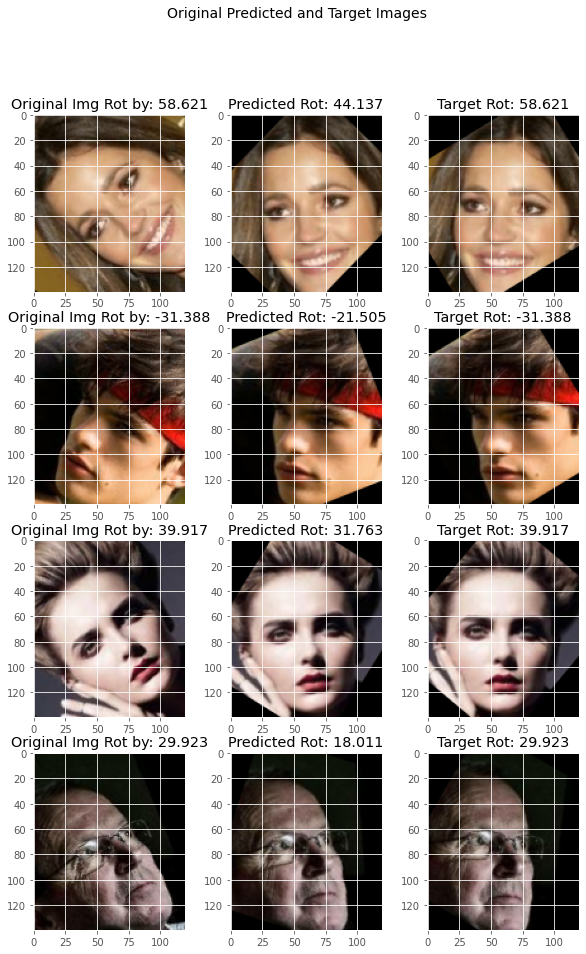

In [170]:
fig, ax = plt.subplots(4,3, figsize = (10,15))
plt.suptitle('Original Predicted and Target Images', fontsize = 14)
c_cnt = 0
for i in test_rot_ds.take(1):
  for r_cnt in range(4):

    ax[r_cnt][0].imshow(i[0][r_cnt]) #Original Image
    img = i[0][r_cnt]
    #print(img)
    ax[r_cnt][0].set_title(f'Original Img Rot by: {round(float(i[1][r_cnt]), 3)}') #Degrees Rotated (Target)
    og_dg = i[1][r_cnt]
    pr_dg = ld_model.predict(i[0])[r_cnt]
    #print('Degrees Printed:',pr_dg)

    #rotimg = ndimage.rotate(img, pr_dg, reshape=False, order=3)
    #rotimg = np.clip(rotimg, 0., 1.)
    #rotimg = tf.image.resize_with_crop_or_pad(rotimg,140,120)
    #print(rotimg)

    ax[r_cnt][1].imshow(tf_rot_resize_new(i[0][r_cnt], -pr_dg))
    ax[r_cnt][1].set_title(f'Predicted Rot: {round(float(pr_dg),3)}')

    ax[r_cnt][2].imshow(tf_rot_resize_new(i[0][r_cnt], -og_dg))
    ax[r_cnt][2].set_title(f'Target Rot: {round(float(og_dg),3)}')






### Inference:
1. The first column is the images that have been randomly rotated from the test set
2. The second Column are images that have been rotated with the help from predictions from our neural network 
3. Third column is the Target ie straight images. 

We had a validation loss of around 70 due to lack of training time but we can see how we can rotate the images if we were to train our model further and get close to accurate results.

## 2.3.1 Saliency Maps and Grad Cam

In [ ]:
for i in test_rot_ds.take(1):
  tst_or_img = i[0][2]
  crct_label = i[1][2]

In [ ]:
# model modifier and loss output 
def img_model_modifier(m):
  pass

def img_loss(output): #did not understand
  global crct_label
  return ((output - crct_label)**2)
  

In [ ]:
img_model_modifier(ld_model)
saliency =Saliency(ld_model, 
                   model_modifier = img_model_modifier, 
                   clone =False)


In [ ]:
saliency_map = saliency(img_loss, tst_or_img)
saliency_map = normalize(saliency_map)

In [ ]:
#smoothgrad 
smooth_grad = saliency(img_loss, tst_or_img, smooth_samples=20, smooth_noise=0.20)
smooth_grad = normalize(smooth_grad)
#plt.imshow(smooth_grad[0], cmap='Purples')

In [ ]:
#gradcam 
gradcam = Gradcam(ld_model, model_modifier=img_model_modifier, clone = False)
gcam = gradcam(img_loss, tst_or_img)
gcam = normalize(gcam)
#plt.imshow(cor_img)
#plt.imshow(gcam[0], cmap='jet', alpha=0.4)

In [ ]:
from tf_keras_vis.gradcam import GradcamPlusPlus
gradcam = GradcamPlusPlus(ld_model, model_modifier=img_model_modifier, clone = False)
gpcam = gradcam(img_loss, tst_or_img)
gpcam = normalize(gpcam)
#plt.imshow(cor_img)
#plt.imshow(gpcam[0], cmap='jet', alpha=0.4)

In [ ]:
from tf_keras_vis.scorecam import ScoreCAM

# Create ScoreCAM object
scorecam = ScoreCAM(ld_model, model_modifier = img_model_modifier, clone=False)

# Generate heatmap with Faster-ScoreCAM
scam = scorecam(img_loss,tst_or_img)
scam = normalize(scam)

#plt.imshow(cor_img)
#plt.imshow(scam[0], cmap='jet', alpha=0.5)


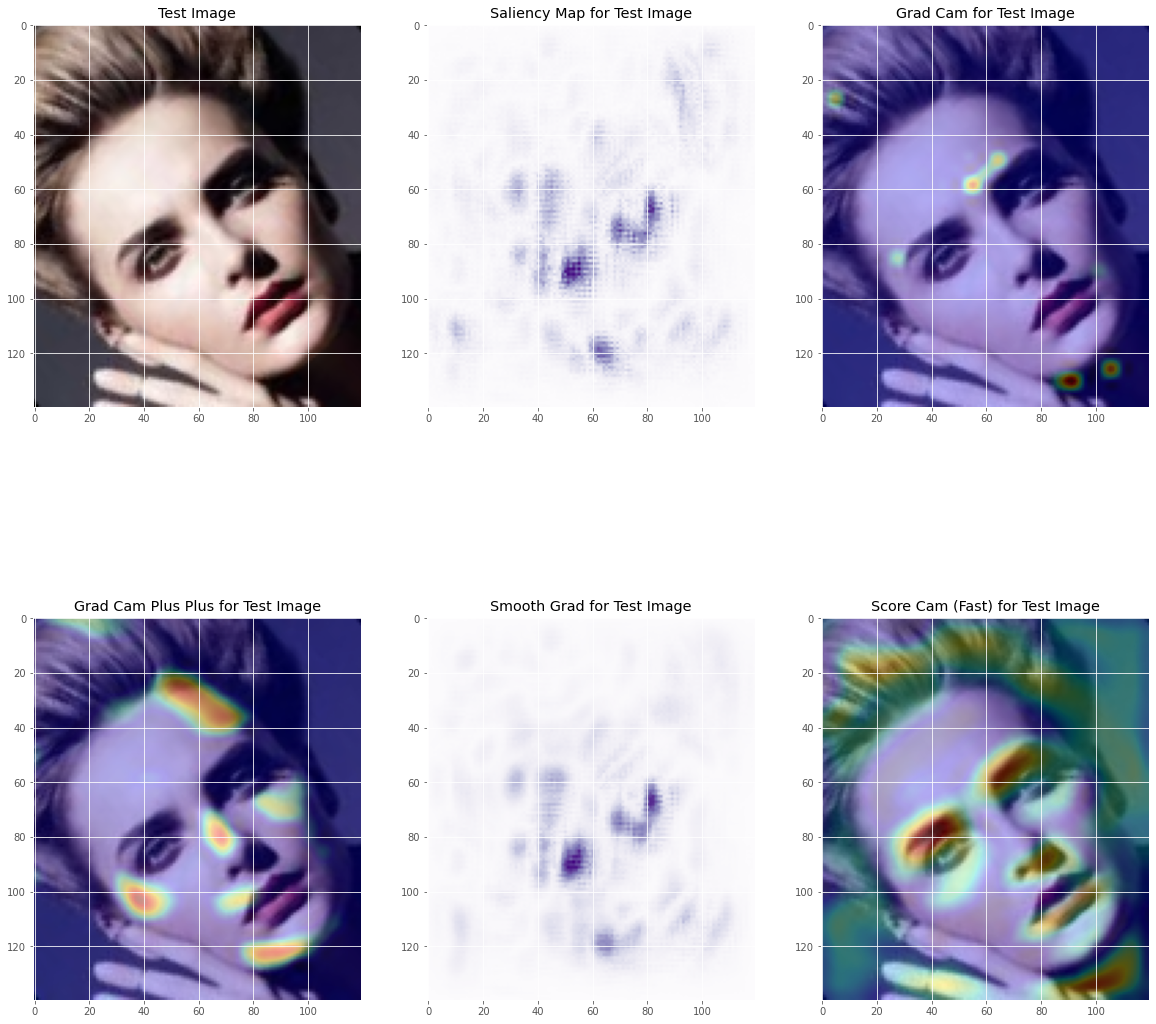

In [ ]:
fig, ax = plt.subplots(2,3, figsize = (20,20))

ax[0][0].imshow(tst_or_img)
ax[0][0].set_title('Test Image')

ax[0][1].imshow(saliency_map[0],cmap='Purples')
ax[0][1].set_title('Saliency Map for Test Image')


ax[1][2].imshow(tst_or_img)
ax[1][2].imshow(scam[0], cmap='jet', alpha=0.3)
ax[1][2].set_title('Score Cam (Fast) for Test Image')

ax[1][1].imshow(smooth_grad[0], cmap='Purples')
ax[1][1].set_title('Smooth Grad for Test Image')

ax[0][2].imshow(tst_or_img)
ax[0][2].imshow(gcam[0], cmap='jet', alpha=0.3)
ax[0][2].set_title('Grad Cam for Test Image')

ax[1][0].imshow(tst_or_img)
ax[1][0].imshow(gpcam[0], cmap='jet', alpha=0.3)
ax[1][0].set_title('Grad Cam Plus Plus for Test Image')

plt.show()

### Inference:
1. Saliency Map - We can see that the saliency map in concentrating on the under eye and lip region of the face to make the predictions
2. Initial Grad cam result shows us that the model is looking at upper eye are mainly forehead to make its prediction 
3. Grad cam plus plus shows us that the model is looking at all facial features to make it predictions. 
4. We have also plotted score cam to get an inference of pixel contribution in prediction

## 2.3.2 Giving our own Input Image and testing the Model

(140, 120, 3)
(1, 140, 120, 3)


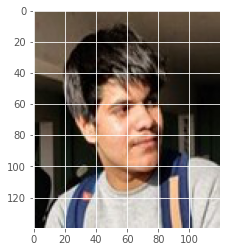

In [ ]:
#Inputing own Image to Test
from matplotlib import image
tst_1 = image.imread('test_model2_v2.jpg')
tst_1 = tst_1/255.
print(tst_1.shape)
tst_1 = np.expand_dims(tst_1,0)
print(tst_1.shape)
plt.imshow(tst_1[0])


In [ ]:
tst_1 = tf.convert_to_tensor(tst_1)

Text(0.5, 1.0, 'Predicted Rot: 6.801')

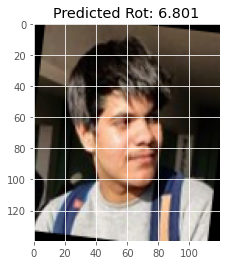

In [ ]:
pr_dg = ld_model.predict(tst_1)
#print(pr_dg)
plt.imshow(tf_rot_resize_new(tst_1[0], -pr_dg[0]))
plt.title(f'Predicted Rot: {round(float(pr_dg),3)}')


### Inference:

As seen from above, we have given an input image of Araz, where he is tilting himself, and so the picture has come out slightly askew.

Given to the model, the model rotates the image, straigtening it out, thus removing the error by the photographer :D 